<a href="https://colab.research.google.com/github/rifkyaditya9/portfolio/blob/main/EAFC24%20Clustering/EAFC24_Clustering_Rifky_Aditya_Pradana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/male_players.csv')
df.head()

<ipython-input-23-5f32724abe50>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DS/male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


Menampilkan Column

In [ ]:
df.describe().columns

Index(['player_id', 'fifa_version', 'fifa_update', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'league_id', 'league_level', 'club_jersey_number',
       'club_contract_valid_until_year', 'nationality_id', 'nation_team_id',
       'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_intercept

## Memilih Fitur yang akan digunakan untuk Clustering (Feature Selection)

In [ ]:
df = df[['short_name', 'fifa_version', 'overall', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

df.head()

,short_name,fifa_version,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,K. Mbappé,24.0,91,97.0,90.0,80.0,92.0,36.0,78.0,78,...,88.0,26,34,32,13,5,7,11,6,NaN
1,E. Haaland,24.0,91,89.0,93.0,66.0,80.0,45.0,88.0,47,...,87.0,38,47,29,7,14,13,11,7,NaN
2,K. De Bruyne,24.0,91,72.0,88.0,94.0,87.0,65.0,78.0,95,...,88.0,66,70,53,15,13,5,10,13,NaN
3,L. Messi,24.0,90,80.0,87.0,90.0,94.0,33.0,64.0,83,...,96.0,20,35,24,6,11,15,14,8,NaN
4,K. Benzema,24.0,90,79.0,88.0,83.0,87.0,39.0,78.0,75,...,90.0,43,24,18,13,11,5,5,7,NaN


Hanya menggunakan data pemain dengan rating lebih dari 84 (untuk menghemat memori) dan versi terbaru dari data pemain

In [ ]:
df = df[(df['overall'] > 84) & (df['fifa_version'] == 24)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   91 non-null     object 
 1   fifa_version                 91 non-null     float64
 2   overall                      91 non-null     int64  
 3   pace                         76 non-null     float64
 4   shooting                     76 non-null     float64
 5   passing                      76 non-null     float64
 6   dribbling                    76 non-null     float64
 7   defending                    76 non-null     float64
 8   physic                       76 non-null     float64
 9   attacking_crossing           91 non-null     int64  
 10  attacking_finishing          91 non-null     int64  
 11  attacking_heading_accuracy   91 non-null     int64  
 12  attacking_short_passing      91 non-null     int64  
 13  attacking_volleys     

Melakukan drop row data yang memiliki duplikat nama pemain

In [ ]:
df = df.drop_duplicates(subset='short_name', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   91 non-null     object 
 1   fifa_version                 91 non-null     float64
 2   overall                      91 non-null     int64  
 3   pace                         76 non-null     float64
 4   shooting                     76 non-null     float64
 5   passing                      76 non-null     float64
 6   dribbling                    76 non-null     float64
 7   defending                    76 non-null     float64
 8   physic                       76 non-null     float64
 9   attacking_crossing           91 non-null     int64  
 10  attacking_finishing          91 non-null     int64  
 11  attacking_heading_accuracy   91 non-null     int64  
 12  attacking_short_passing      91 non-null     int64  
 13  attacking_volleys     

Melakukan pengecekan apakah terdapat data Null di setiap kolom

In [ ]:
df.isnull().sum()

short_name                      0
fifa_version                    0
overall                         0
pace                           15
shooting                       15
passing                        15
dribbling                      15
defending                      15
physic                         15
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_acceleration           0
movement_sprint_speed           0
movement_agility                0
movement_reactions              0
movement_balance                0
power_shot_power                0
power_jumping                   0
power_stamina                   0
power_strength                  0
power_long_shots                0
mentality_aggr

Data Null diisi dengan angka 0

In [ ]:
df = df.fillna(0)
df.isnull().sum()

short_name                     0
fifa_version                   0
overall                        0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_

Menyimpan data nama pemain ke variabel 'names' dan drop kolom 'short_name', 'overall', 'fifa_version' karena tidak digunakan dalam pembuatan clustering

In [ ]:
names = df.short_name.tolist()

df = df.drop(['short_name', 'overall', 'fifa_version'], axis=1)

In [ ]:
df.head()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,...,88.0,26,34,32,13,5,7,11,6,0.0
1,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,...,87.0,38,47,29,7,14,13,11,7,0.0
2,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,...,88.0,66,70,53,15,13,5,10,13,0.0
3,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,...,96.0,20,35,24,6,11,15,14,8,0.0
4,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,...,90.0,43,24,18,13,11,5,5,7,0.0


## Melakukan Scaling dan Normalisasi data

In [ ]:
from sklearn import preprocessing

x = df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

Menentukan PCA dan melakukan fitting PCA tersebut pada data yang telah di-Normalisasi

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # Untuk Plot 2 Dimensi
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced2 = pd.DataFrame(pca.fit_transform(X_norm))

## Melakukan proses Clustering menggunakan Algoritma K-Means

In [ ]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster (Goalkeeper, Defender, Midfielder, Attacker)
kmeans = KMeans(n_clusters=4)

# Melakukan fitting data
kmeans_labels = kmeans.fit_predict(reduced)

# Mendapatkan pusat dari masing-masing cluster
centers = kmeans.cluster_centers_

# Mendapatkan label untuk setiap data point
clusters = kmeans.labels_.tolist()

reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,cluster,name
0,-0.929905,-0.965637,2,K. Mbappé
1,-0.725731,-0.526616,2,E. Haaland
2,-1.092495,-0.260631,2,K. De Bruyne
3,-0.805075,-1.207498,2,L. Messi
4,-0.787795,-0.825247,2,K. Benzema


In [ ]:
pip install adjustText

## Visualisasi Plot hasil clustering Algoritma K-Means

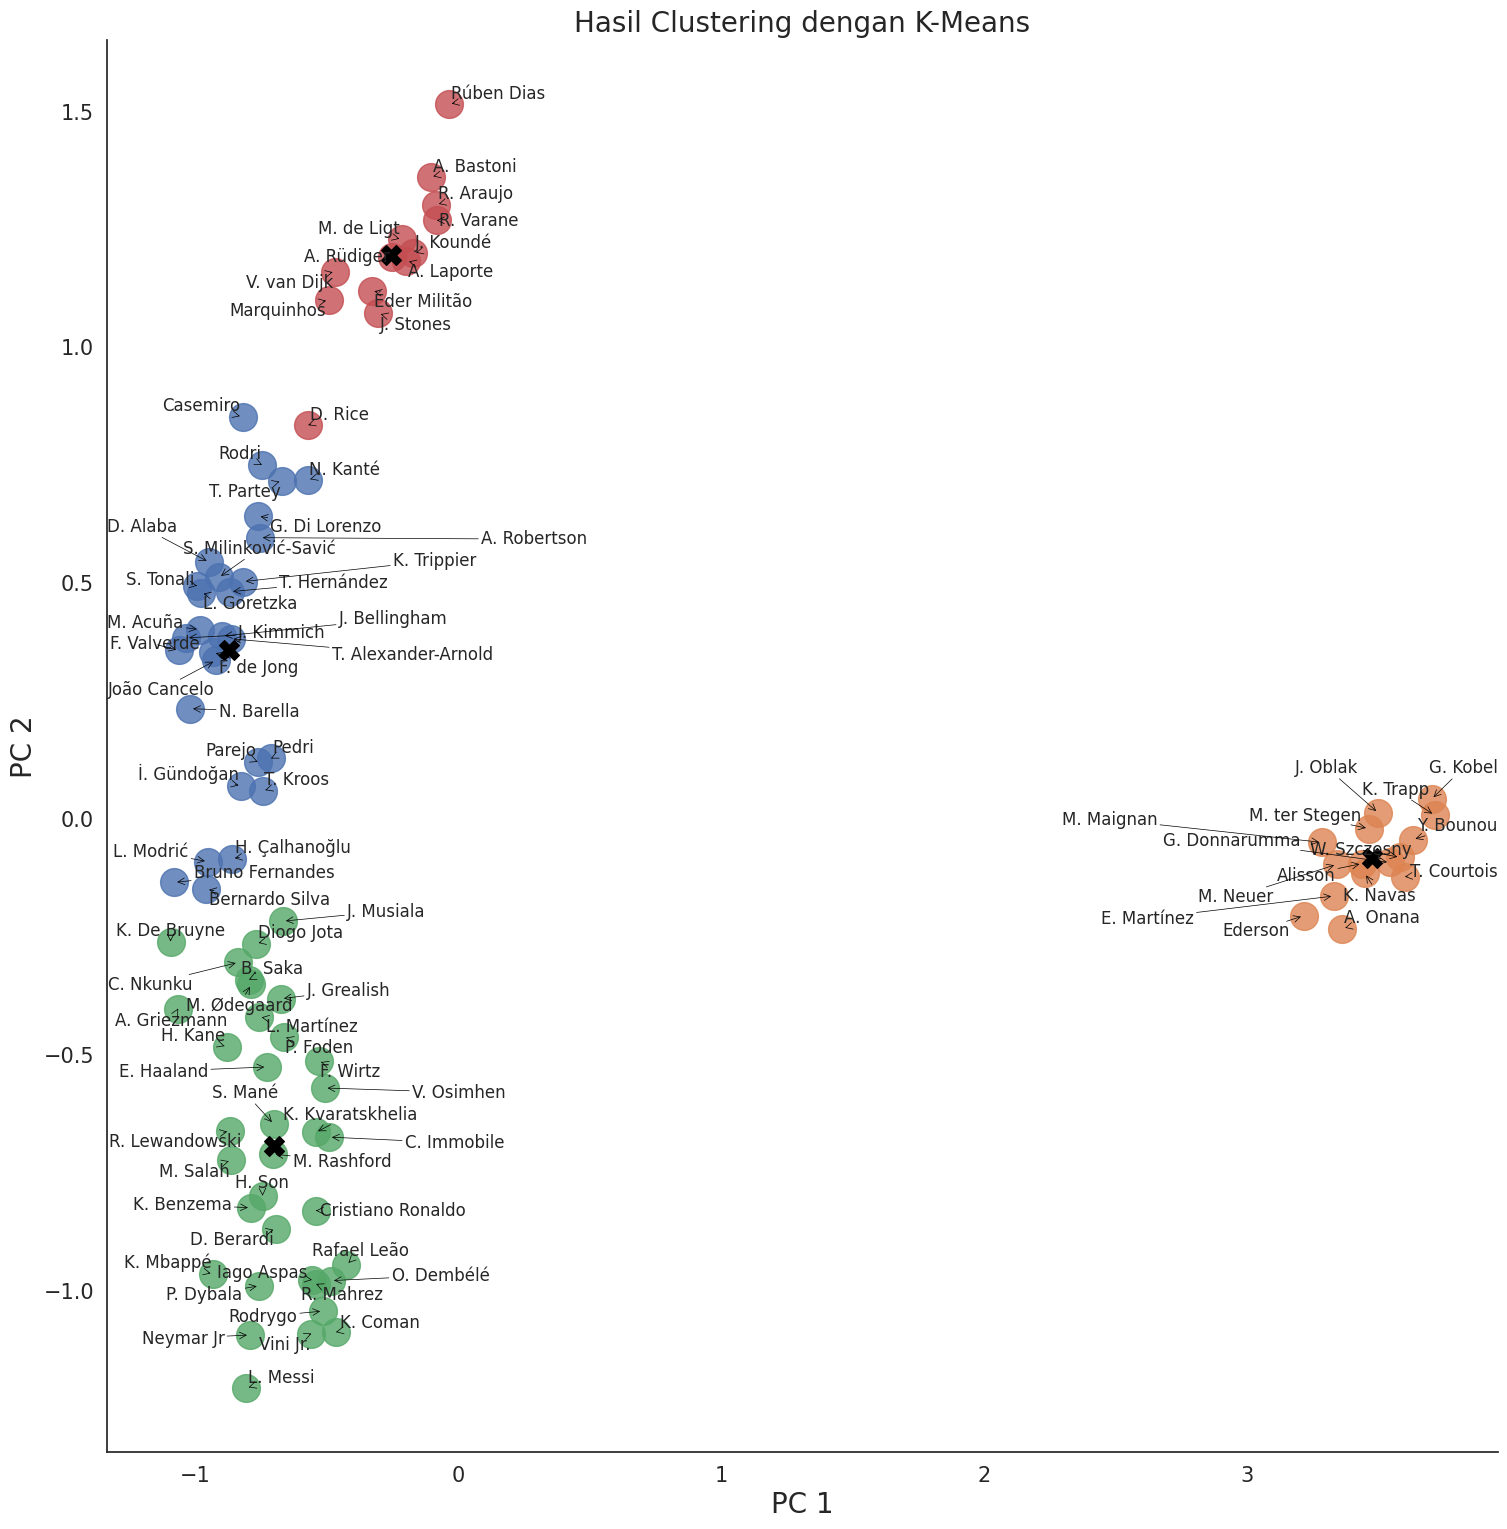

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

sns.set(style="white")
sns.lmplot(x='x', y='y', hue='cluster', data=reduced, legend=False, fit_reg=False, height=15, scatter_kws={"s": 400})

# Menampilkan nama pemain di setiap titik
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

# Menyesuaikan posisi teks agar tidak tumpang tindih
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

# ax.set(ylim=(-1.5, 1.8))
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title('Hasil Clustering dengan K-Means', fontsize=20)
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()

## Agglomerative Clustering

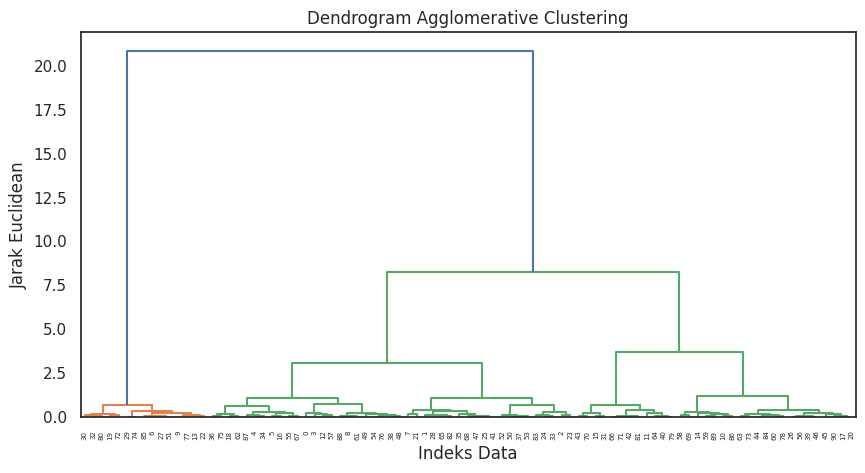

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Menentukan jumlah cluster (Goalkeeper, Defender, Midfielder, Attacker)
n_clusters = 4

# Melakukan hierarchical clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative_labels = agglomerative_cluster.fit_predict(reduced2)

# Mendapatkan label untuk setiap data point
reduced2['cluster'] = agglomerative_labels
reduced2['name'] = names
reduced2.columns = ['x', 'y', 'cluster', 'name']

# Membentuk matriks linkage untuk dendrogram
linkage_matrix = linkage(reduced2[['x', 'y']], method='ward')

# Menampilkan dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak Euclidean')
plt.show()




## Visualisasi Plot hasil clustering Algoritma Aggromerative

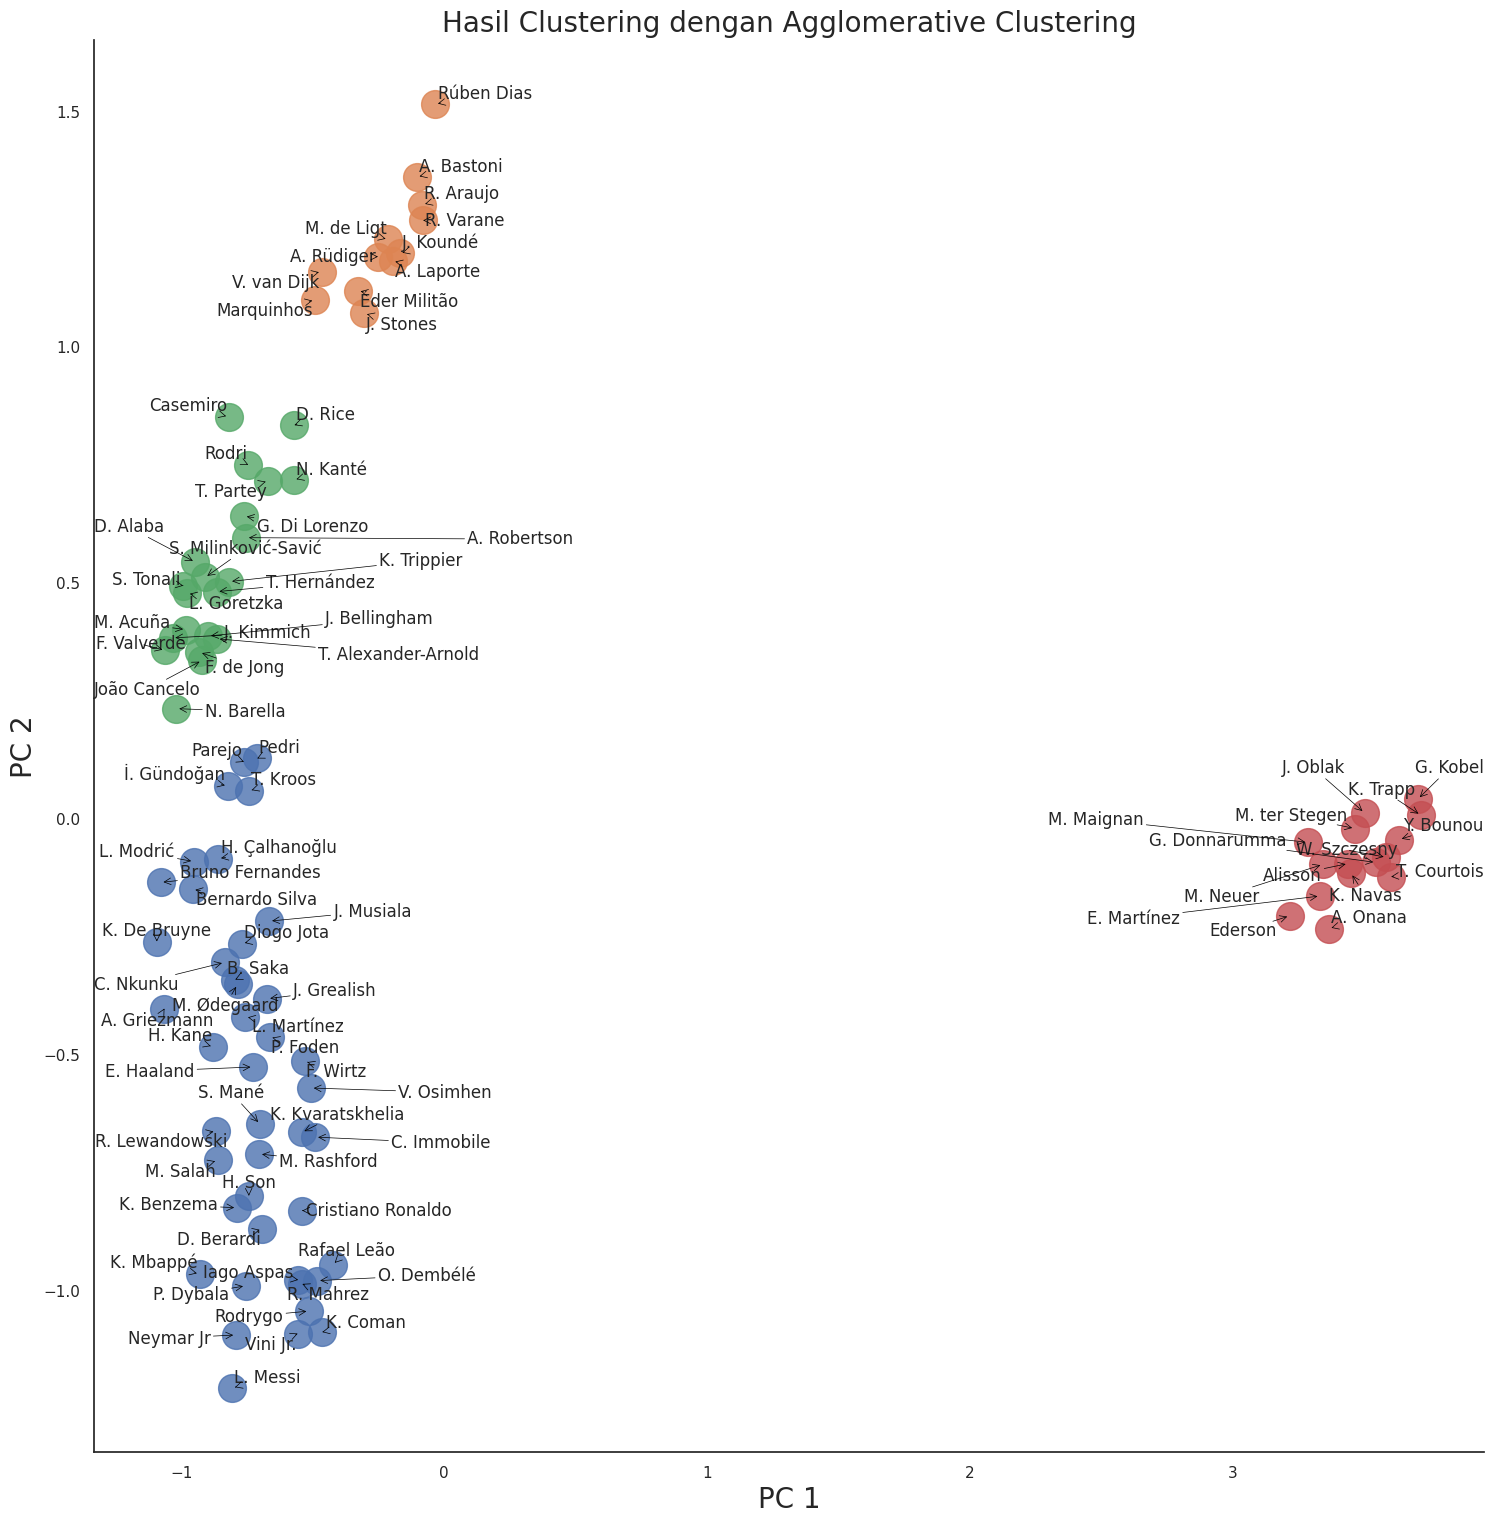

In [ ]:
# Visualisasi hasil clustering dengan Seaborn scatterplot
sns.set(style="white")
ax = sns.lmplot(x='x', y='y', hue='cluster', data=reduced2, legend=False, fit_reg=False, height=15, scatter_kws={"s": 400})

# Menampilkan nama pemain di setiap titik
texts = []
for x, y, s in zip(reduced2.x, reduced2.y, reduced2.name):
    texts.append(plt.text(x, y, s))

# Menyesuaikan posisi teks agar tidak tumpang tindih
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title('Hasil Clustering dengan Agglomerative Clustering', fontsize=20)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()

## Menghitung Score dari kedua Algoritma

In [ ]:
from sklearn.metrics import silhouette_score

reduced = reduced.drop(['name'], axis=1)
reduced2 = reduced2.drop(['name'], axis=1)

# Mengukur tingkat akurasi dengan Silhouette Score
silhouette_kmeans = silhouette_score(reduced, kmeans_labels)
silhouette_agglomerative = silhouette_score(reduced2, agglomerative_labels)

# Menampilkan hasil
print(f'Silhouette Score K-Means: {silhouette_kmeans:.4f}')
print(f'Silhouette Score Agglomerative: {silhouette_agglomerative:.4f}')

Silhouette Score K-Means: 0.8490
Silhouette Score Agglomerative: 0.8075
